# Import packages

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
#read in dnm data into a dataframe
df_dnm = pd.read_csv('/Users/cmdb/Downloads/aau1043_dnm.tsv')
df_dnm


,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [3]:
#read in paternal ages into dataframe
df_ages = pd.read_csv('/Users/cmdb/Downloads/aau1043_parental_age.tsv')
df_ages

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


In [4]:
#Create three new dataframes:
#Use .value_counts() on 'Proband_id' to get number of dnms per id
#.rename_axis to set the name of the axis to Proband_id and index name as appropriate 
tot_f = pd.DataFrame(df_dnm['Proband_id'].value_counts().rename_axis('Proband_id').reset_index(name='tot_dnm'))
#To get total dnms inherited from mom will want to count where Phase_combined == 'mother'
mat_f = pd.DataFrame(df_dnm['Proband_id'][df_dnm['Phase_combined']=='mother'].value_counts().rename_axis('Proband_id').reset_index(name='mat_dnm'))
#To get total dnms inherited from dad will want to count where Phase combined == 'father'
pat_f = pd.DataFrame(df_dnm['Proband_id'][df_dnm['Phase_combined']=='father'].value_counts().rename_axis('Proband_id').reset_index(name='pat_dnm'))

In [5]:
#merge dataframes with counts on 'Proband_id'
new_df = pd.DataFrame.merge(tot_f, mat_f, on ='Proband_id')
new_df_2 = pd.DataFrame.merge(new_df, pat_f, on ='Proband_id')
new_df_2

,Proband_id,tot_dnm,mat_dnm,pat_dnm
0,91410,122,10,111
1,114094,121,22,98
2,111288,115,21,93
3,8147,114,27,78
4,88246,113,25,87
...,...,...,...,...
391,121087,37,1,36
392,62630,34,5,28
393,76504,34,5,27
394,37789,34,3,17


In [6]:
#Now merge dataframe with counts with df_ages on 'Proband_id'
df_final = pd.DataFrame.merge(new_df_2, df_ages, on ='Proband_id')
df_final

,Proband_id,tot_dnm,mat_dnm,pat_dnm,Father_age,Mother_age
0,91410,122,10,111,51,34
1,114094,121,22,98,51,44
2,111288,115,21,93,53,44
3,8147,114,27,78,40,33
4,88246,113,25,87,56,46
...,...,...,...,...,...,...
391,121087,37,1,36,18,17
392,62630,34,5,28,23,20
393,76504,34,5,27,19,17
394,37789,34,3,17,19,19


# Fit and interpret linear regression models

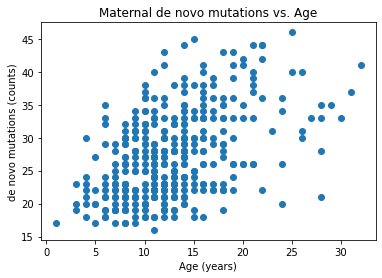

In [11]:
fig, ax = plt.subplots()
ax.scatter(x=df_final['mat_dnm'], y=df_final['Mother_age'])
ax.set_title('Maternal de novo mutations vs. Age')
ax.set_ylabel('de novo mutations (counts)')
ax.set_xlabel('Age (years)')
plt.show()

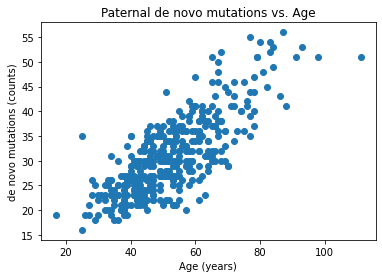

In [10]:
fig, ax = plt.subplots()
ax.scatter(x=df_final['pat_dnm'], y=df_final['Father_age'])
ax.set_title('Paternal de novo mutations vs. Age')
ax.set_ylabel('de novo mutations (counts)')
ax.set_xlabel('Age (years)')
plt.show()

In [12]:
#Use ordinary least squares to test for association between maternal age and mat_dnm
model = smf.ols(formula = "Mother_age ~ mat_dnm", data = df_final)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Mother_age   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        13:24:28   Log-Likelihood:                -1250.7
No. Observations:                 396   AIC:                             2505.
Df Residuals:                     394   BIC:                             2513.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.5164      0.770     25.336      0.000      18.002      21.031
mat_dnm        0.6026      0.056     10.772      0.000       0.493       0.713
==============================================================================
Omnibus:                       10.828   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.046
Skew:                           0.385   Prob(JB):                      0.00399
Kurtosis:                       2.723   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
#Use ordinary least squares to test for association between paternal age and pat_dnm
model = smf.ols(formula = "Father_age ~ pat_dnm", data = df_final)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Father_age   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        15:23:25   Log-Likelihood:                -1191.6
No. Observations:                 396   AIC:                             2387.
Df Residuals:                     394   BIC:                             2395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0178      0.972      7.220      0.000       5.107       8.929
pat_dnm        0.4571      0.018     25.291      0.000       0.422       0.493
==============================================================================
Omnibus:                        3.967   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.721
Skew:                           0.226   Prob(JB):                        0.156
Kurtosis:                       3.146   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The associations between both maternal and paternal ages and inherited de novo mutations are both significant. This relationship is slightly stronger with paternal age. 

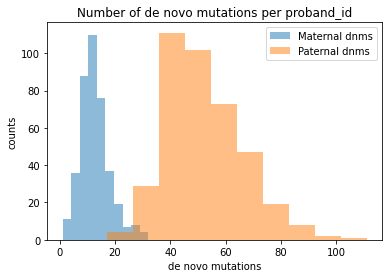

In [16]:
fig, ax = plt.subplots()
ax.hist(df_final['mat_dnm'], alpha = 0.5, label='Maternal dnms')
ax.hist(df_final['pat_dnm'], alpha = 0.5, label = 'Paternal dnms')
ax.set_ylabel('counts')
ax.set_xlabel('de novo mutations')
ax.set_title('Number of de novo mutations per proband_id')
ax.legend()
plt.show()

In [18]:
stats.ttest_ind(df_final['mat_dnm'], df_final['pat_dnm'])

Ttest_indResult(statistic=-53.403565287269245, pvalue=2.1986031793078793e-264)

## Generalized linear models: Poission regression

In [53]:
m_model = smf.poisson(formula= 'Mother_age ~ mat_dnm', data = df_)
m_model = smf.poisson(formula = 'mat_dnm ~ Mother_age', data = df_final)
results_mat = model.fit()
results_mat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Mother_age   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        14:17:48   Log-Likelihood:                -1250.7
No. Observations:                 396   AIC:                             2505.
Df Residuals:                     394   BIC:                             2513.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.5164      0.770     25.336      0.000      18.002      21.031
mat_dnm        0.6026      0.056     10.772      0.000       0.493       0.713
==============================================================================
Omnibus:                       10.828   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.046
Skew:                           0.385   Prob(JB):                      0.00399
Kurtosis:                       2.723   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
p_model = smf.poisson(formula = 'pat_dnm ~ Father_age', data = df_final)
results_pat = model.fit()
results_pat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Mother_age   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        14:18:58   Log-Likelihood:                -1250.7
No. Observations:                 396   AIC:                             2505.
Df Residuals:                     394   BIC:                             2513.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.5164      0.770     25.336      0.000      18.002      21.031
mat_dnm        0.6026      0.056     10.772      0.000       0.493       0.713
==============================================================================
Omnibus:                       10.828   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.046
Skew:                           0.385   Prob(JB):                      0.00399
Kurtosis:                       2.723   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""